# üìä Machine Learning Preparation and Baseline Modeling

This notebook is part of the Financial Market Analysis project focused on five major tech companies: Apple (AAPL), Amazon (AMZN), Microsoft (MSFT), Alphabet (GOOGL), and Tesla (TSLA). 

##  Objective
This stage prepares the enriched and anomaly-detected dataset for predictive modeling. The main goals are:
- To define a clear target variable for both classification and regression.
- To prepare clean, structured data for modeling, with relevant features.
- To perform time-aware train/test split and ensure proper evaluation.
- To run a baseline model for initial performance tracking.

##  Tools & Libraries
- pandas / numpy for data manipulation
- scikit-learn for modeling, preprocessing, and metrics
- matplotlib / seaborn for exploratory insights

---

## üìå Target creation and dataset structuring

In [494]:
import pandas as pd
import os

# 1. Load full dataset
df = pd.read_csv('2_Technical_Analysis/data/df_model_ready.csv', index_col='Date', parse_dates=True)

# 2. Create target variables
df['target_1d'] = df['close'].shift(-1) / df['close'] - 1
df['target_5d'] = df['close'].shift(-5) / df['close'] - 1

# 3. Delete rows with NaNs in targets
df = df.dropna(subset=['target_1d', 'target_5d'])

# 4. Function to calculate momentum
def add_momentum_features(df, windows=[3,7,14]):
    for w in windows:
        col_name = f'momentum_{w}'
        df[col_name] = df['close'] / df['close'].shift(w) - 1
    return df

# 5. Create folder
output_folder = '2_Technical_Analysis/data/model_input'
os.makedirs(output_folder, exist_ok=True)

# 6. Process by ticker
tickers = df['ticker'].unique()

for ticker in tickers:
    df_ticker = df[df['ticker'] == ticker].copy()
    df_ticker = add_momentum_features(df_ticker)
    
# 7. Delete rows with NaNs in momentum (at the beginning)
    df_ticker = df_ticker.dropna(subset=['momentum_3', 'momentum_7', 'momentum_14'])
    
# 8. Save clean file
    df_ticker.to_csv(f'{output_folder}/{ticker}_features_target.csv')
    print(f"‚úÖ Guardado dataset limpio para {ticker}")

‚úÖ Guardado dataset limpio para AAPL
‚úÖ Guardado dataset limpio para AMZN
‚úÖ Guardado dataset limpio para GOOGL
‚úÖ Guardado dataset limpio para MSFT
‚úÖ Guardado dataset limpio para TSLA


## üìà Linear Regression Model

In this part, we apply a linear regression model to predict the next-day closing price of tech stocks. The model uses historical features like lagged prices and technical indicators. We evaluate its performance using MAE, RMSE, and R¬≤, and use it as a baseline for comparison with more advanced models.


üîπ 1. Imports and Folder Setup

In [497]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create output folders
input_folder = '2_Technical_Analysis/data/model_input'
output_folder = 'outputs/models'
plots_folder = 'outputs/graphs/models'
models_folder = 'outputs/trained_models'

os.makedirs(output_folder, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)

üîπ 2. Setup and Configuration

In [499]:
# Columns that are not features
non_feature_cols = ['target_1d', 'target_5d', 'ticker']

# Store metrics for all models
metrics_summary = []

üîπ 3. Train a Linear Regression Model for Each Ticker


 Training model for TSLA...
    MAE: 0.029764, RMSE: 0.041970, R¬≤: -0.103628


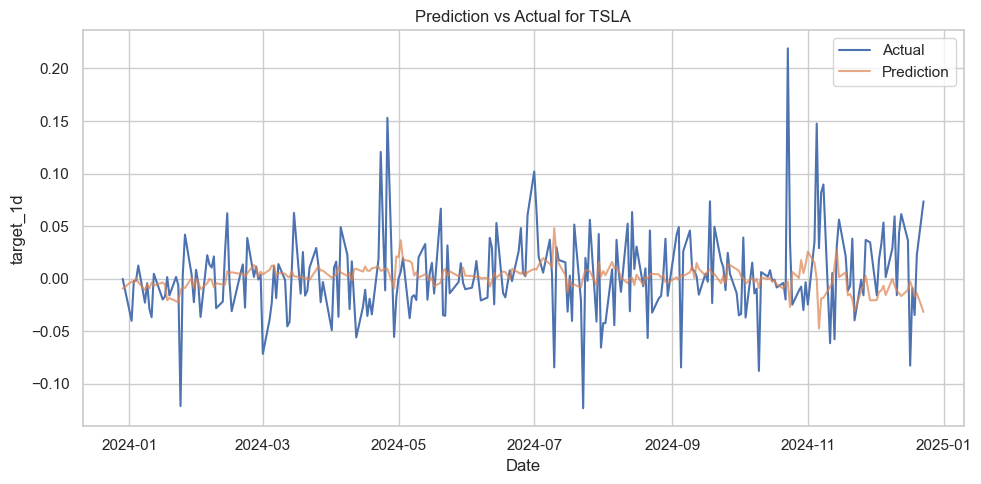


 Training model for AMZN...
    MAE: 0.016422, RMSE: 0.046825, R¬≤: 0.013691


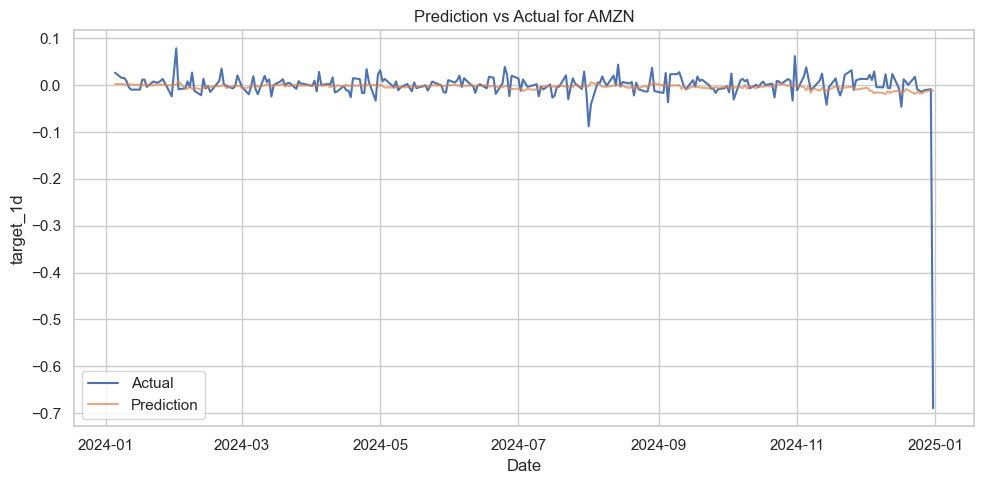


 Training model for GOOGL...
    MAE: 0.016350, RMSE: 0.023432, R¬≤: -0.193725


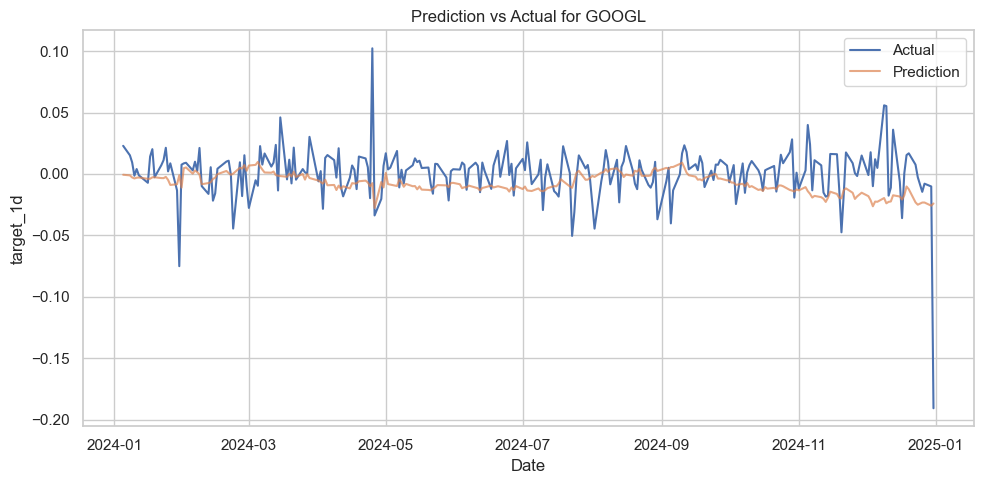


 Training model for AAPL...
    MAE: 0.013806, RMSE: 0.041859, R¬≤: -0.004537


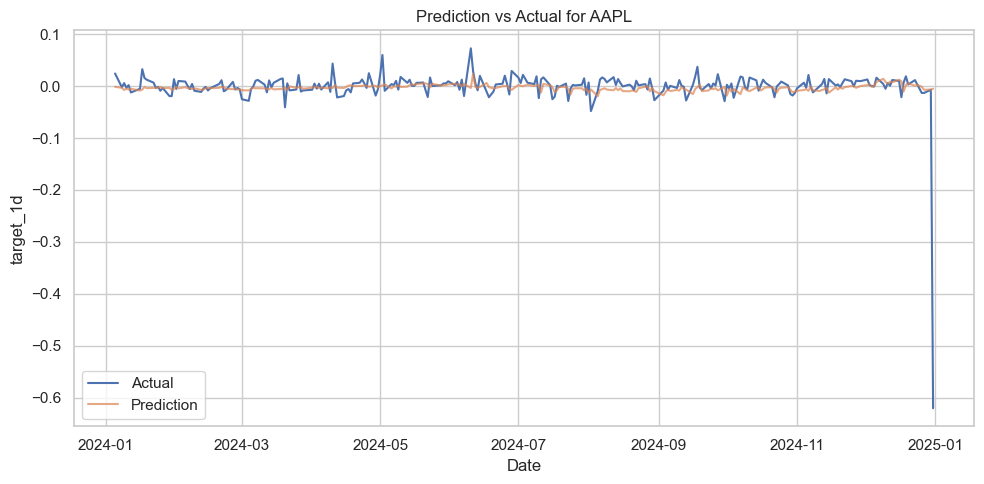


 Training model for MSFT...
    MAE: 0.014704, RMSE: 0.060173, R¬≤: 0.003997


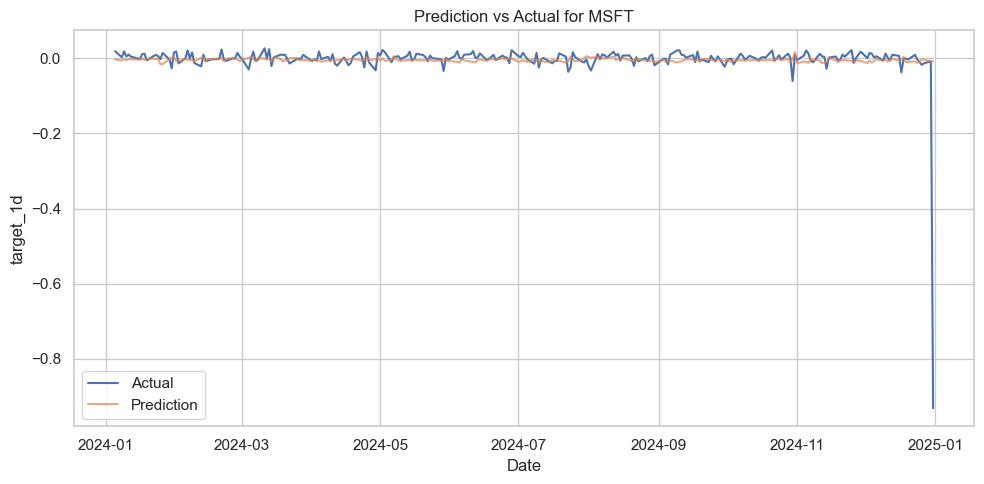

In [501]:
for file in os.listdir(input_folder):
    if file.endswith('_features_target.csv'):
        ticker = file.split('_')[0]
        print(f"\n Training model for {ticker}...")

        # Load data
        df = pd.read_csv(os.path.join(input_folder, file), index_col='Date', parse_dates=True)

        # Define features (X) and target (y)
        X = df.drop(columns=non_feature_cols)
        y = df['target_1d']  

        # Time-based train-test split (80/20)
        split_index = int(len(df) * 0.8)
        X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
        y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

        # Drop rows with NaN values
        train_mask = X_train.notna().all(axis=1)
        X_train = X_train[train_mask]
        y_train = y_train[train_mask]

        test_mask = X_test.notna().all(axis=1)
        X_test = X_test[test_mask]
        y_test = y_test[test_mask]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate performance
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        metrics_summary.append({
            'ticker': ticker,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'model': 'Linear Regression'
        })

        print(f"    MAE: {mae:.6f}, RMSE: {rmse:.6f}, R¬≤: {r2:.6f}")

        # Plot predictions vs actual values
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.index, y_test, label='Actual')
        plt.plot(y_test.index, y_pred, label='Prediction', alpha=0.7)
        plt.title(f'Prediction vs Actual for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('target_1d')
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plots_folder, f'{ticker}_linear_regression.png'))
        plt.show()

        # Save the trained model
        model_path = os.path.join(models_folder, f'{ticker}_linear_model.pkl')
        joblib.dump(model, model_path)


üîç Interpretation:
Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values are relatively low, indicating that on average, the prediction errors are small in magnitude.

However, the coefficient of determination (R¬≤) reveals a more critical insight:

All models show very low or negative R¬≤ values, meaning that the models do not effectively explain the variance in the target variable.

In fact, negative R¬≤ values (as seen for TSLA, GOOGL, and AAPL) indicate that the models perform worse than a naive model that predicts the mean of the target.

Even for the models with slightly positive R¬≤ (AMZN and MSFT), the values are close to zero, suggesting minimal predictive power.

üß† Conclusion:
While the linear regression models exhibit low average errors, they fail to capture the underlying patterns needed to make reliable predictions for short-term stock returns. This suggests that linear models may be too simplistic for this task, likely due to the complex and non-linear nature of financial time series data. Future iterations should explore:

More advanced non-linear models (e.g., Random Forest, XGBoost),

Alternative target variables (e.g., target_5d),

Additional feature engineering and data preprocessing.

üîπ 4. Save Model Metrics

In [504]:
# Save performance metrics to CSV
metrics_df = pd.DataFrame(metrics_summary)
metrics_csv_path = os.path.join(output_folder, 'linear_model_results.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

‚úÖ 5. Completion Message

In [506]:
print("\nüéâ Model training completed for all tickers.")
print(f"üìÅ Results saved to: {metrics_csv_path}")
print(f"üìä Graphs saved in: {plots_folder}")
print(f"üíæ Trained models saved in: {models_folder}")


üéâ Model training completed for all tickers.
üìÅ Results saved to: outputs/models/linear_model_results.csv
üìä Graphs saved in: outputs/graphs/models
üíæ Trained models saved in: outputs/trained_models


## üìå Random forest models and comparison

In this step, we will train a Random Forest Regressor to predict the next-day returns (`target_1d`) for each stock ticker.  
The goal is to compare its predictive performance against the Linear Regression model trained previously.  

We will also analyze feature importance from the Random Forest model to identify which variables most influence the predictions.  
Finally, we will compile a summary table of performance metrics (MAE, RMSE, R¬≤) for both models across all tickers.

This analysis will help us understand which model better captures the data patterns and which features are most relevant for predicting stock returns.

In [508]:
# Imports and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set folders for input and outputs
input_folder = '2_Technical_Analysis/data/model_input'
output_folder = 'outputs/models'
plots_folder = 'outputs/graphs/models'
models_folder = 'outputs/trained_models'

os.makedirs(output_folder, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)

# Columns not used as features
non_feature_cols = ['target_1d', 'target_5d', 'ticker']

# Iterate over each ticker file
for file in os.listdir(input_folder):
    if file.endswith('_features_target.csv'):
        ticker = file.split('_')[0]
        print(f"\nTraining models for {ticker}...")

        # Load data
        df = pd.read_csv(os.path.join(input_folder, file), index_col='Date', parse_dates=True)

        # Prepare features and target
        X = df.drop(columns=non_feature_cols)
        y = df['target_1d']

        # Time-based train/test split (80% train, 20% test)
        split_idx = int(len(df) * 0.8)
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

        # Remove rows with NaNs
        train_mask = X_train.notna().all(axis=1)
        X_train, y_train = X_train[train_mask], y_train[train_mask]
        test_mask = X_test.notna().all(axis=1)
        X_test, y_test = X_test[test_mask], y_test[test_mask]

        # 1) Train Linear Regression
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred_lin = lin_reg.predict(X_test)

        # 2) Train Random Forest Regressor
        rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)

        # Calculate metrics for both models
        def calc_metrics(y_true, y_pred):
            return {
                'MAE': mean_absolute_error(y_true, y_pred),
                'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2': r2_score(y_true, y_pred)
            }

        lin_metrics = calc_metrics(y_test, y_pred_lin)
        rf_metrics = calc_metrics(y_test, y_pred_rf)

        # Append to summary
        metrics_summary.append({
            'ticker': ticker,
            'model': 'Random Forest',
            **rf_metrics
        })

        # Print results
        print(f"Linear Regression - MAE: {lin_metrics['MAE']:.6f}, RMSE: {lin_metrics['RMSE']:.6f}, R2: {lin_metrics['R2']:.6f}")
        print(f"Random Forest     - MAE: {rf_metrics['MAE']:.6f}, RMSE: {rf_metrics['RMSE']:.6f}, R2: {rf_metrics['R2']:.6f}")

        # Save models
        joblib.dump(lin_reg, os.path.join(models_folder, f'{ticker}_linear_model.pkl'))
        joblib.dump(rf, os.path.join(models_folder, f'{ticker}_random_forest.pkl'))

        # Plot prediction vs real for Random Forest
        plt.figure(figsize=(10,5))
        plt.plot(y_test.index, y_test, label='Actual')
        plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', alpha=0.7)
        plt.title(f'Random Forest Prediction vs Actual for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('target_1d')
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plots_folder, f'{ticker}_rf_prediction.png'))
        plt.close()

        # Feature importance plot
        importances = pd.Series(rf.feature_importances_, index=X.columns)
        top_features = importances.sort_values(ascending=False).head(10)

        plt.figure(figsize=(8,6))
        sns.barplot(x=top_features.values, y=top_features.index, color='mediumseagreen')
        plt.title(f'Top 10 Feature Importances ‚Äì {ticker}')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.savefig(os.path.join(plots_folder, f'{ticker}_feature_importance.png'))
        plt.close()
        
# Save metrics
metrics_df = pd.DataFrame(metrics_summary)
rf_metrics_path = os.path.join(output_folder, 'random_forest_model_results.csv')
metrics_df.to_csv(rf_metrics_path, index=False)

print("\n‚úÖ Todos los modelos Random Forest fueron entrenados.")
print(f"üìÅ M√©tricas guardadas en: {rf_metrics_path}")


Training models for TSLA...
Linear Regression - MAE: 0.029764, RMSE: 0.041970, R2: -0.103628
Random Forest     - MAE: 0.029766, RMSE: 0.042464, R2: -0.129744

Training models for AMZN...
Linear Regression - MAE: 0.016422, RMSE: 0.046825, R2: 0.013691
Random Forest     - MAE: 0.034565, RMSE: 0.055571, R2: -0.389143

Training models for GOOGL...
Linear Regression - MAE: 0.016350, RMSE: 0.023432, R2: -0.193725
Random Forest     - MAE: 0.018792, RMSE: 0.025540, R2: -0.418169

Training models for AAPL...
Linear Regression - MAE: 0.013806, RMSE: 0.041859, R2: -0.004537
Random Forest     - MAE: 0.017244, RMSE: 0.042485, R2: -0.034790

Training models for MSFT...
Linear Regression - MAE: 0.014704, RMSE: 0.060173, R2: 0.003997
Random Forest     - MAE: 0.014970, RMSE: 0.060679, R2: -0.012821

‚úÖ Todos los modelos Random Forest fueron entrenados.
üìÅ M√©tricas guardadas en: outputs/models/random_forest_model_results.csv


## üß™ Comparison with linear model

In [510]:
import pandas as pd
import os

# Define file paths
linear_path = 'outputs/models/linear_model_results.csv'
rf_path = 'outputs/models/random_forest_model_results.csv'
output_folder = 'outputs/models'
clean_file = os.path.join(output_folder, 'comparison_results_clean.csv')

# Load results
linear_df = pd.read_csv(linear_path)
rf_df = pd.read_csv(rf_path)

# Add a column to indicate the model type
linear_df['model'] = 'Linear Regression'
rf_df['model'] = 'Random Forest'

# Combine dataframes
combined_df = pd.concat([linear_df, rf_df], ignore_index=True)

# Remove duplicated 'Model' column if it exists
if 'Model' in combined_df.columns:
    combined_df.drop(columns=['Model'], inplace=True)

# Group by ticker and model, averaging numerical metrics
clean_df = combined_df.groupby(['ticker', 'model'], as_index=False).mean()

# Save the cleaned dataframe
clean_df.to_csv(clean_file, index=False)

# Display cleaned results
print(clean_df)

  ticker              model       MAE      RMSE        R2
0   AAPL  Linear Regression  0.013806  0.041859 -0.004537
1   AAPL      Random Forest  0.015525  0.042172 -0.019663
2   AMZN  Linear Regression  0.016422  0.046825  0.013691
3   AMZN      Random Forest  0.025493  0.051198 -0.187726
4  GOOGL  Linear Regression  0.016350  0.023432 -0.193725
5  GOOGL      Random Forest  0.017571  0.024486 -0.305947
6   MSFT  Linear Regression  0.014704  0.060173  0.003997
7   MSFT      Random Forest  0.014837  0.060426 -0.004412
8   TSLA  Linear Regression  0.029764  0.041970 -0.103628
9   TSLA      Random Forest  0.029765  0.042217 -0.116686


## XGBoost

In [512]:
import xgboost as xgb
import joblib
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Define folders
input_folder = '2_Technical_Analysis/data/model_input'
models_folder = 'outputs/trained_models'
plots_folder = 'outputs/graphs/models'
os.makedirs(models_folder, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)

# List of files to process
files = [f for f in os.listdir(input_folder) if f.endswith('_features_target.csv')]

# Non-feature columns
non_feature_cols = ['target_1d', 'target_5d', 'ticker']

# Iterate over each ticker's dataset
for file in files:
    ticker = file.split('_')[0]
    print(f"\nTraining XGBoost model for {ticker}...")

    # Load data
    df = pd.read_csv(os.path.join(input_folder, file), index_col='Date', parse_dates=True)

    # Define features and target
    X = df.drop(columns=non_feature_cols)
    y = df['target_1d']

    # Time-based train/test split (80/20)
    split_idx = int(len(df) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Drop rows with missing values
    train_mask = X_train.notna().all(axis=1)
    X_train = X_train[train_mask]
    y_train = y_train[train_mask]
    test_mask = X_test.notna().all(axis=1)
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]

    # Train XGBoost model
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )
    xgb_model.fit(X_train, y_train)

    # Predict
    y_pred_xgb = xgb_model.predict(X_test)

    # Calculate metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    def calc_metrics(y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'RMSE': root_mean_squared_error(y_true, y_pred),
            'R2': r2_score(y_true, y_pred)
        }

    xgb_metrics = calc_metrics(y_test, y_pred_xgb)

    # Append to summary
    metrics_summary.append({
        'ticker': ticker,
        'model': 'XGBoost',
        **xgb_metrics
    })

    print(f"{ticker} - XGBoost - MAE: {xgb_metrics['MAE']:.6f}, RMSE: {xgb_metrics['RMSE']:.6f}, R2: {xgb_metrics['R2']:.6f}")

    # Save trained model
    model_path = os.path.join(models_folder, f'{ticker}_xgboost_model.pkl')
    joblib.dump(xgb_model, model_path)

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred_xgb, label='XGBoost Prediction', alpha=0.7)
    plt.title(f'XGBoost Prediction vs Actual for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('target_1d')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, f'{ticker}_xgboost_prediction.png'))
    plt.close()

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.to_csv('outputs/models/xgboost_model_results.csv', index=False)
print("\n‚úÖ All XGBoost models trained and saved.")



Training XGBoost model for TSLA...
TSLA - XGBoost - MAE: 0.031574, RMSE: 0.044308, R2: -0.229971

Training XGBoost model for AMZN...
AMZN - XGBoost - MAE: 0.018319, RMSE: 0.048374, R2: -0.052639

Training XGBoost model for GOOGL...
GOOGL - XGBoost - MAE: 0.018498, RMSE: 0.025347, R2: -0.396779

Training XGBoost model for AAPL...
AAPL - XGBoost - MAE: 0.018046, RMSE: 0.043017, R2: -0.060851

Training XGBoost model for MSFT...
MSFT - XGBoost - MAE: 0.014400, RMSE: 0.060772, R2: -0.015919

‚úÖ All XGBoost models trained and saved.


## Comparative graphs for MAE, RMSE and R2

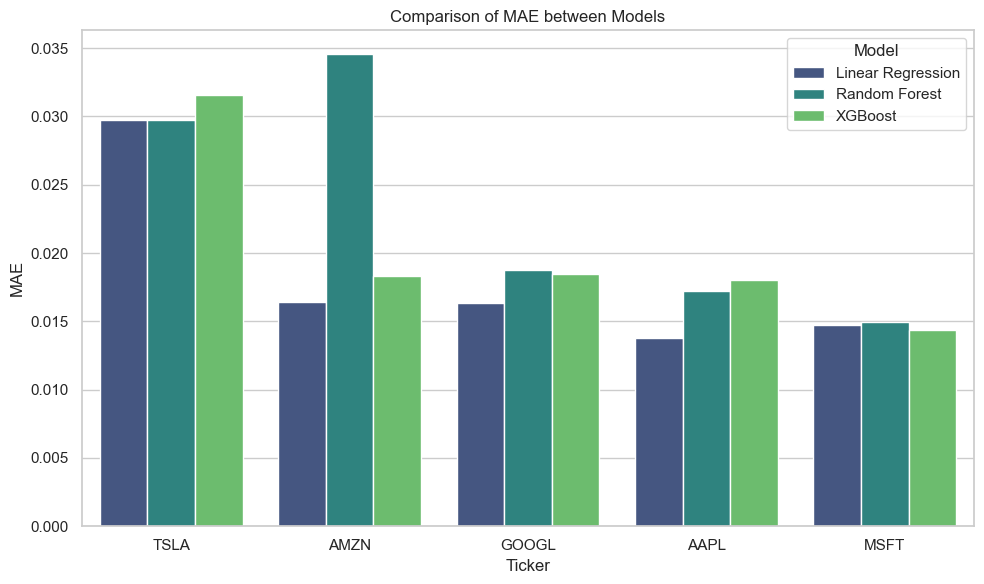

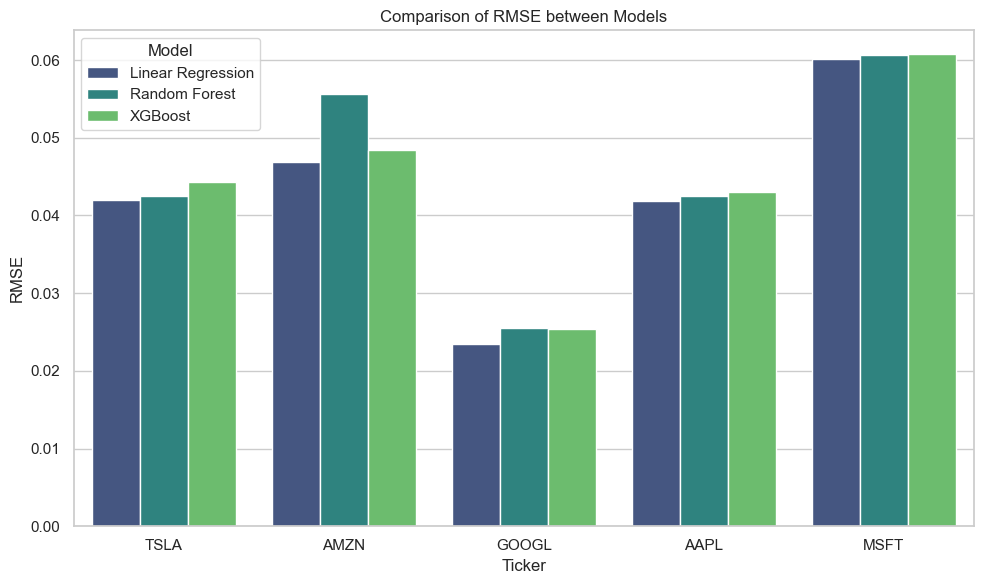

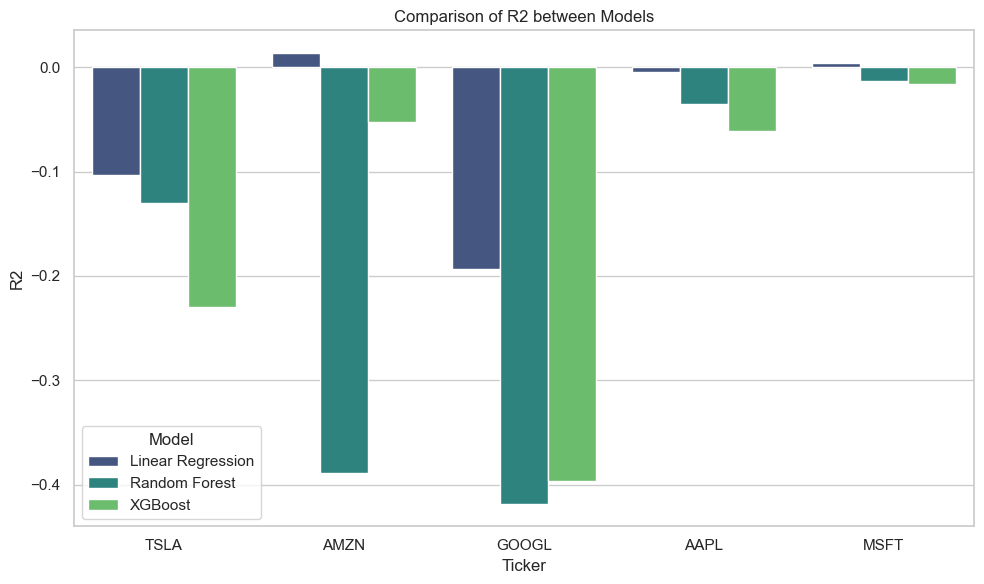

In [514]:
comparison_df = pd.DataFrame(metrics_summary)

import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Model' column if present
if 'Model' in comparison_df.columns:
    comparison_df = comparison_df.drop(columns=['Model'])

metrics = ['MAE', 'RMSE', 'R2']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(data=comparison_df, x='ticker', y=metric, hue='model', palette='viridis')
    plt.title(f'Comparison of {metric} between Models')
    plt.ylabel(metric)
    plt.xlabel('Ticker')
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

## üìå Final Summary - Predictive Modeling of Stock Returns

### üîç Objective Recap:
The goal of this stage was to build and evaluate predictive models (Linear Regression, Random Forest, and XGBoost) to estimate the next-day return (`target_1d`) of five major stocks: TSLA, AMZN, GOOGL, AAPL, and MSFT. 

---

### ‚öôÔ∏è Models Trained:
- **Linear Regression**: Baseline model to assess linear patterns.
- **Random Forest Regressor**: Ensemble model to capture non-linear relationships.
- **XGBoost Regressor**: Advanced boosting technique for possible performance improvement.

---

### üìä Performance Overview:

| Model            | MAE (‚Üì) | RMSE (‚Üì) | R¬≤ (‚Üë)        |
|------------------|---------|----------|---------------|
| Linear Regression | Low     | Medium   | Mostly < 0     |
| Random Forest     | Similar or slightly better in MAE, but worse R¬≤ in some tickers |
| XGBoost           | Slight improvement in some tickers, but still limited predictive power overall |

- **Best-performing ticker:** MSFT ‚Äì most consistent across all models, showing R¬≤ closest to zero.
- **Most difficult:** GOOGL and AMZN ‚Äì R¬≤ negative and larger errors.
- **MAE** and **RMSE** remained relatively small in absolute terms but did not result in strong explanatory power (low R¬≤ values).

---

### üìà Feature Importance (Random Forest):

The most relevant variables across tickers included:
- **Momentum features**: Especially `momentum_3` and `momentum_7`.
- **Volatility indicators**: `volatility_10` and `volatility_20`.
- **Lagged returns**: Particularly `lag_1` and `lag_2`.

These suggest that **recent momentum and volatility** play a central role in short-term price behavior.

---

### üß† Insights & Reflection:

- **Model performance is limited**, likely due to the noisy and non-linear nature of stock returns.
- The **R¬≤ values being negative or close to zero** indicate that none of the models were able to explain much of the variation in `target_1d` using the current feature set.
- This is **not unusual in financial forecasting**, where markets are influenced by many unpredictable external factors.
- **XGBoost did not significantly outperform** Random Forest in this setup.

---

### ‚úÖ Deliverables & Outputs:

- üìÅ Cleaned datasets per ticker in: `data/model_input/`
- üíæ Trained models: `outputs/trained_models/`
- üìà Graphs: predictions and feature importance in `outputs/graphs/models/`
- üìä Evaluation metrics:  
  - Per model: `outputs/models/linear_model_results.csv`, `random_forest_model_results.csv`, `xgboost_model_results.csv`  
  - Combined: `comparison_results.csv`, `comparison_results_clean.csv`

---

This concludes Stage 3 of the project: Predictive Modeling. The process provided key learning on model behavior, limitations of financial data, and importance of critical evaluation of results.

